### Implementation of Fully connected Neural Network
A. Implementation of Error Back propagation algorithm for fully connected neural network to solve two input XOR classification problem.  <br/>
B. Implementation of Error Back propagation algorithm for fully connected neural network to solve three input XNOR classification problem. 

In [26]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
# creating the base layer
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        pass
    def backward(self, output_gradient, learning_rate):
        pass

In [14]:
# creating the Dense layer
class Layer_Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size,input_size)
        self.biases = np.random.randn(output_size,1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input ) + self.biases

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient,self.input.T )
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.biases -=learning_rate * output_gradient
        return input_gradient

In [15]:
# creating the activation layer
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [16]:
# creating the activation functions
# Tanh function
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)
        def tanh_prime(x):
            return 1 - np.tanh(x)**2
        super().__init__(tanh, tanh_prime)

class Linear(Activation):
    def __init__(self):
        def linear(x):
            return x
        
        def linear_prime(x):
            return 1
        
        super().__init__(linear, linear_prime)

In [17]:
# creating the loss function
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

# creating the loss function derivative
def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

In [18]:
# creating the neural network
X = np.reshape(([-1,-1],[-1,1],[1,-1],[1,1]),(4,2,1))
Y = np.reshape(([-1],[1],[1],[-1]),(4,1,1))

network = [
    Layer_Dense(2, 3),
    Tanh(),
    Layer_Dense(3, 1),
    Tanh()
]
epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    error = 0
    for x, y in zip(X, Y):
        # Forward pass
        output = x
        for layer in network:
            output = layer.forward(output)

        error += mse(y, output)
        # Backward pass
        output_gradient = mse_prime(y, output)
        for layer in reversed(network):
            output_gradient = layer.backward(output_gradient, learning_rate)

    if epoch % 1000 == 0:
        print("Epoch",epoch,"Error",error)
    
error/= len (X)
print ("------------------------------------------------------")
print("Final error: ",error)

Epoch 0 Error 6.218354908263778
Epoch 1000 Error 0.002364625407872958
Epoch 2000 Error 0.00100194048260467
Epoch 3000 Error 0.0006328332711532491
Epoch 4000 Error 0.00046169478658533193
Epoch 5000 Error 0.00036310486360948985
Epoch 6000 Error 0.00029905816624631895
Epoch 7000 Error 0.00025413175843269956
Epoch 8000 Error 0.00022088809491722174
Epoch 9000 Error 0.0001953013979187904
------------------------------------------------------
Final error:  4.3755428853937046e-05


In [19]:
# testing the neural network

input_arr = np.reshape(([-1,-1],[-1,1],[1,-1],[1,1]),(4,2,1))
output_arr = np.array(([-1],[1],[1],[-1]))
predicted_arr = np.array([])
for x, y in zip(input_arr, output_arr):
    output = x
    for layer in network:
        output = layer.forward(output)
    predicted_arr = np.append(predicted_arr,output)

print ("Input\t Actual Output\t Predicted Output")
print ("_____________________________________________")
for i in range (len (input_arr)):
    print (input_arr[i],"\t    ",output_arr[i],"\t",predicted_arr[i])
    print ("----------------------------------------------------")

Input	 Actual Output	 Predicted Output
_____________________________________________
[[-1]
 [-1]] 	     [-1] 	 -0.9946931880901012
----------------------------------------------------
[[-1]
 [ 1]] 	     [1] 	 0.992842850074133
----------------------------------------------------
[[ 1]
 [-1]] 	     [1] 	 0.9917447809668798
----------------------------------------------------
[[1]
 [1]] 	     [-1] 	 -0.9947609911473744
----------------------------------------------------


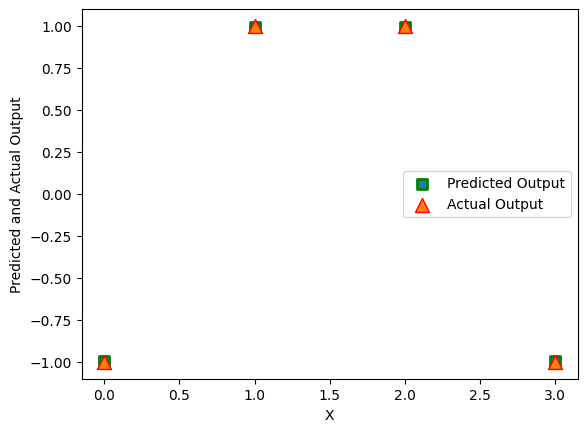

In [20]:
# Plotted the predicted output and actual output

x = np.arange(0,4,1)
plt.scatter(x, predicted_arr, linewidths = 2,marker ="s",edgecolor ="green",s = 50)
plt.scatter(x, output_arr, linewidths = 1,marker ="^",edgecolor ="red",s = 100)
plt.xlabel("X")
plt.ylabel("Predicted and Actual Output")
plt.legend(["Predicted Output", "Actual Output"])
plt.show()


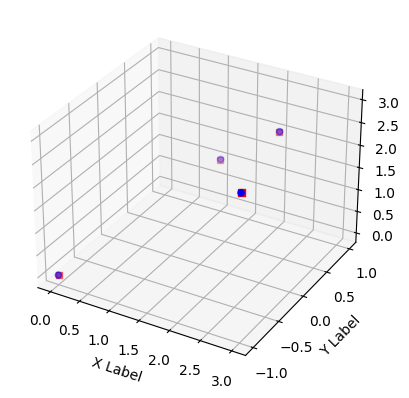

In [21]:
fig = plt.figure()
x = np.arange(0,4,1)
z = np.arange(0,4,1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,predicted_arr,z, c='r', marker='s')
ax.scatter(x,output_arr,z, c='b', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.show()

### 3B -  Implement Error Back propagation algorithm for fully connected neural network to solve three input XNOR classification problem. 

In [27]:
# creating the neural network

X = np.array([[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7]])
Y = np.array([[1.2],[1.4],[1.55],[1.75],[2.01],[2.2],[2.35]])

network = [
    Layer_Dense(1, 1),
    Linear()
]

epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    error = 0
    for x, y in zip(X, Y):
        # Forward pass
        output = x
        for layer in network:
            output = layer.forward(output)

        error += mse(y, output)
        # Backward pass
        output_gradient = mse_prime(y, output)
        for layer in reversed(network):
            output_gradient = layer.backward(output_gradient, learning_rate)

    if epoch % 1000 == 0:
        print("Epoch",epoch,"Error",error)

    
error/= len (X)
print ("-------------------------------------------")
print("Final error: ",error)

Epoch 0 Error 19.867590625290017
Epoch 1000 Error 0.005709402253928425
Epoch 2000 Error 0.005709402253928425
Epoch 3000 Error 0.005709402253928425
Epoch 4000 Error 0.005709402253928425
Epoch 5000 Error 0.005709402253928425
Epoch 6000 Error 0.005709402253928425
Epoch 7000 Error 0.005709402253928425
Epoch 8000 Error 0.005709402253928425
Epoch 9000 Error 0.005709402253928425
-------------------------------------------
Final error:  0.0008156288934183465


In [23]:
# testing the neural network

input_arr = np.array([[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7]])
output_arr = np.array([[1.2],[1.4],[1.55],[1.75],[2.01],[2.2],[2.35]])
predicted_arr = np.array([])

for x, y in zip(input_arr, output_arr):
    output = x
    for layer in network:
        output = layer.forward(output)
    predicted_arr = np.append(predicted_arr,output)
    print("Input:",x,"Output:",output,"Actual:",y)
print ("-------------------------------------------")
print ("Predicted:",predicted_arr)

Input: [0.1] Output: [[1.19031205]] Actual: [1.2]
Input: [0.2] Output: [[1.386833]] Actual: [1.4]
Input: [0.3] Output: [[1.58335395]] Actual: [1.55]
Input: [0.4] Output: [[1.7798749]] Actual: [1.75]
Input: [0.5] Output: [[1.97639585]] Actual: [2.01]
Input: [0.6] Output: [[2.1729168]] Actual: [2.2]
Input: [0.7] Output: [[2.36943775]] Actual: [2.35]
-------------------------------------------
Predicted: [1.19031205 1.386833   1.58335395 1.7798749  1.97639585 2.1729168
 2.36943775]


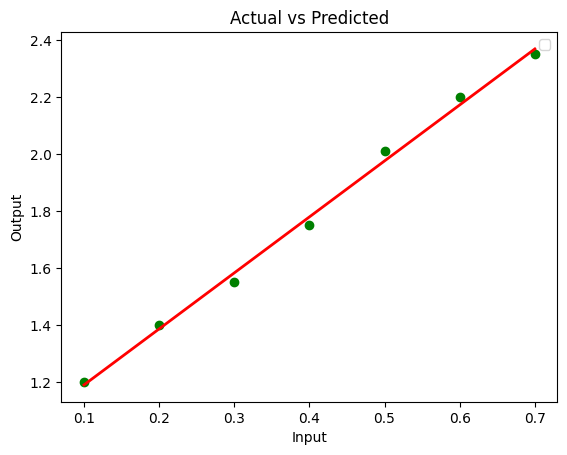

In [28]:
plt.scatter(input_arr, output_arr, color='green' )  # Actual data
plt.plot(input_arr, predicted_arr, color='red', linewidth=2, label='Predicted')  # Predicted data
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Actual vs Predicted')
plt.legend("")
plt.show()